<a href="https://colab.research.google.com/github/MONOUE/perceptron/blob/master/Catherine_MONOUE_KONGA_Perceptron_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please make a copy of the notebook before you start updating it.

# Import libraries and load the data from sklearn dataset

In [1]:
 ### Import packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
### Import datasets from sklearn.datasets
data = load_iris()

In [3]:
#### Target 

target = data.target

In [4]:
### Count the number of uniques values

N_= np.unique(target)

In [5]:
print('the unique values in the targets are', N_)

the unique values in the targets are [0 1 2]


In [6]:
target.shape

(150,)

## Remove the class 2 in our dataset in order to have a binary classification problem

In [8]:
##############
y = np.array([i for i in target if i!=2])

#######

In [9]:
y.shape

(100,)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Replace all 0 in the target by -1 using numpy

In [12]:
#############
# your code here
y=np.where(y==0,-1,y)
###########

In [13]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [14]:
### Inputs values
Inputs = data.data

In [15]:
Inputs.shape

(150, 4)

## Let's remove the last 50 rows in the inputs data (they belong to the class 2)

In [16]:
#### New Input
X = Inputs[:100,:]

In [17]:
X.shape

(100, 4)

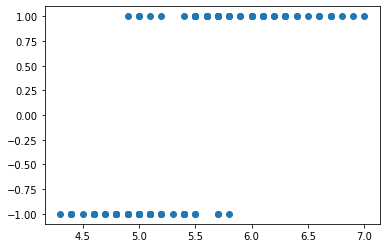

In [18]:
plt.scatter(X[:, 0], y)

## Combines the dataset and Shuffle them using numpy

In [40]:
### Combines the input X and the target y
np.random.seed(1)
dataset= np.hstack([X,y.reshape(100,1)])
np.random.shuffle(dataset)
## shuffle the data



In [ ]:
np.c_[X,y]

## Split the data into (X_train, Y_train), (X_test, Y_test):  80% for training and 20% for test

In [36]:
#########
# your code here
index_train= int(0.8*len(dataset))
X_train= dataset[:index_train,:-1]
X_test= dataset[index_train:,:-1]
Y_train= dataset[:index_train,-1]
Y_test= dataset[index_train:,-1]
###########

In [37]:
print(X_train.shape)

(80, 4)


In [38]:
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80,)
(20, 4)
(20,)


## Implement the class Perceptron

$ŷ[i] = Θ^TX[i]$

if  $y[i]*np.sign(ŷ[i]) <= 0$:

        update Θ: Θ = Θ + y[i]*X[i]
else:

      Θ = Θ

## For prediction: 

np.sign(X @ Θ)

In [76]:
class perceptron:
    
    #eps = 1e-2
    def __init__(self, X, Y,theta,iter_= 100):
        self.X = X
        self.Y = Y
        self.iter_ = iter_
        self.theta = theta
        
        
    def train(self):
      self.theta= self.theta.reshape(-1,1)
        #loop over the number of iteration and the number of example
      for _ in range(self.iter_ ):
        for i in range(len(self.X)):
          output= self.X[i].reshape(1,-1) @ self.theta

          if self.Y[i]* output<0:
            self.theta+=self.Y[i]*self.X[i].reshape(-1,1)
        # compute the output of the model and update theta if necessary
        
    
    def predic(self,X):
      return np.sign(X @ self.theta)
        
    
    def accuracy(self,X,Y):
        ## number of correctly predicted examples * 100
        return np.mean([int(self.predic(X)[i] * Y[i]> 0) for  i in range(len(Y))])*100
            

In [77]:
perceptron = perceptron(X_train,Y_train,np.random.rand(4)*1e-4)

In [78]:
perceptron.train()

In [79]:
perceptron.predic(X_test)

array([[-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.]])

In [83]:
perceptron.accuracy(X_test, Y_test)

100.0

In [85]:
np.sum(Y_test.reshape(-1,1)==perceptron.predic(X_test))

20